In [63]:
import pandas as pd

In [64]:
data = pd.read_csv('FALL&NOT FALL BACK.csv')

In [65]:
data.head()

,Bot Response,Status
0,Truist Knowledge Domain: ➡️ Advisor Support ->...,NOT FALL BACK
1,Truist Knowledge Domain: ➡️ Advisor Support ->...,NOT FALL BACK
2,Truist Knowledge Domain: ➡️ Advisor Support ->...,NOT FALL BACK
3,Truist Knowledge Domain: ➡️ Advisor Support ->...,NOT FALL BACK
4,Truist Knowledge Domain: ➡️ Advisor Support ->...,NOT FALL BACK


In [66]:
data['Bot Response'] = data['Bot Response'].apply(lambda x: x.replace('\n', ' '))

In [67]:
data['Status'] = data['Status'].replace({"NOT FALL BACK" : 0, "FALL BACK" : 1})

In [68]:
data.nunique()

Bot Response    199
Status            2
dtype: int64

In [69]:
data.tail()

,Bot Response,Status
194,"I'm sorry, but I couldn't find specific inform...",1
195,If you're facing challenges with customer prof...,1
196,I don’t have details on household structure mo...,1
197,"For help with family account management, I rec...",1
198,I don’t have exact details on household struct...,1


In [70]:
from transformers import BertTokenizer, BertModel
import torch

In [71]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [72]:
def get_bert_embeddings(sentences):
    embeddings = []
    for sentence in sentences:
        inputs = tokenizer(sentence, return_tensors='pt', padding=True, truncation=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
        sentence_embedding = outputs.last_hidden_state.mean(dim=1).squeeze()
        embeddings.append(sentence_embedding)
    return np.array([embedding.numpy() for embedding in embeddings])

In [73]:
import numpy as np

In [74]:
sentence_embeddings = get_bert_embeddings(data['Bot Response'])

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(sentence_embeddings, data['Status'], test_size=0.2, random_state=42)

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [80]:
len(X_train)

159

In [81]:
len(X_test)

40

In [82]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [84]:
example = "I don't have any relevant information on that topic."
inputs = tokenizer(example, return_tensors='pt', padding=True, truncation=True, max_length=512)
with torch.no_grad():
    outputs = model(**inputs)
sentence_embedding = outputs.last_hidden_state.mean(dim=1).squeeze()

In [86]:
sentence_embedding = sentence_embedding.numpy()

In [87]:
sentence_embedding

array([ 1.37060791e-01,  4.58527803e-01, -2.13932171e-01, -8.56950209e-02,
       -1.02117606e-01, -4.02501374e-01, -1.19254708e-01,  7.49894500e-01,
        9.65455323e-02, -1.77848682e-01, -9.04677436e-02, -6.13193214e-01,
       -1.29599094e-01,  7.12435305e-01,  2.34711561e-02,  3.93149376e-01,
        4.29141149e-02, -1.11891866e-01, -2.34871171e-02,  2.31586337e-01,
        6.46483665e-03, -5.00968732e-02, -2.96287447e-01,  2.86759675e-01,
        4.65693295e-01, -3.97990018e-01, -3.90143663e-01,  2.58693188e-01,
       -2.22036466e-01, -2.83692718e-01,  3.85238647e-01,  2.72898346e-01,
       -2.05548093e-01,  5.09054363e-01,  1.29554003e-01, -4.55621146e-02,
       -5.49787050e-03,  1.42352149e-01, -3.21699232e-01,  6.64218143e-02,
       -4.80547577e-01, -2.19933353e-02,  8.97683725e-02,  1.56404421e-01,
        3.33483852e-02, -1.39219478e-01,  4.13648456e-01, -1.93017170e-01,
        1.40450131e-02, -1.26240015e-01, -9.69034806e-02,  3.91200632e-01,
       -7.94953331e-02,  

In [88]:
clf.predict([sentence_embedding])

array([1], dtype=int64)

In [89]:
y_pred = clf.predict(X_test)

In [90]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

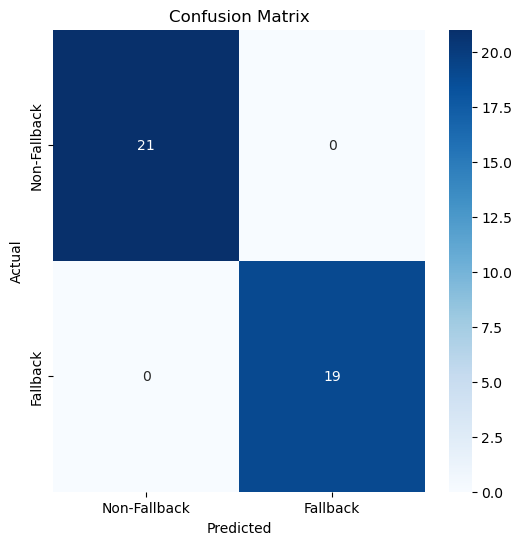

In [92]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fallback", "Fallback"], yticklabels=["Non-Fallback", "Fallback"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [94]:
example2 = data['Bot Response'].iloc[198]

In [95]:
example2

'I don’t have exact details on household structure modifications, but I suggest reaching out to Operations Support for guidance.'

In [96]:
inputs = tokenizer(example2, return_tensors='pt', padding=True, truncation=True, max_length=512)
with torch.no_grad():
    outputs = model(**inputs)
sentence_embedding = outputs.last_hidden_state.mean(dim=1).squeeze()

In [98]:
clf.predict([sentence_embedding.numpy()])

array([1], dtype=int64)

In [99]:
import joblib

In [100]:
joblib.dump(clf, 'fallback.joblib')

['fallback.joblib']

In [102]:
example3 = data['Bot Response'].iloc[0]

In [103]:
inputs = tokenizer(example3, return_tensors='pt', padding=True, truncation=True, max_length=512)
with torch.no_grad():
    outputs = model(**inputs)
sentence_embedding = outputs.last_hidden_state.mean(dim=1).squeeze()

In [104]:
clf.predict([sentence_embedding.numpy()])

array([0], dtype=int64)